In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('C:\\Users\\HP\\Documents\\ds_salaries.csv')
data

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [7]:
# information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [9]:
# changing a column name from the data
change_column = np.array(data.columns)
change_column[0] = 'S/N'
change_column

array(['S/N', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'], dtype=object)

In [11]:
data = pd.DataFrame(data.values, columns = change_column)
data.head()

,S/N,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [13]:
data = data.reindex(data['S/N']).drop(['S/N'], axis = 1)
data

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
S/N,,,,,,,,,,,
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M


In [21]:
# checking for null data
data.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

In [23]:
# replacing the experience level,company size,employement type,remote_ratio with the real name
# Mapping for experience level
df = pd.DataFrame(data)
experience_mapping = {
    'MI': 'Middle Level',
    'SE': 'Senior Level',
    'EX': 'Expert',
    'EN': 'Entry Level'
}

# Mapping for employment type
employment_mapping = {
    'FT': 'Full-Time',
    'PT': 'Part-Time',
    'CT': 'Contract',
    'FL': 'Freelance'
}
# mapping for company size
company_mapping = {
    'L': 'Large',
    'M': 'Medium',
    'S': 'Small'
}

# mapping for remote ratio
remote_mapping = {
    0 : 'No Remote',
    50 : 'Partially Remote',
    100 : 'Fully Remote'
}



# Update all columns
df['experience_level'] = df['experience_level'].map(experience_mapping)
df['employment_type'] = df['employment_type'].map(employment_mapping)
df['company_size'] = df['company_size'].map(company_mapping)
df['remote_ratio'] = df['remote_ratio'].map(remote_mapping)

# Print the entire updated DataFrame
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
S/N,,,,,,,,,,,
0,2020,Middle Level,Full-Time,Data Scientist,70000,EUR,79833,DE,No Remote,DE,Large
1,2020,Senior Level,Full-Time,Machine Learning Scientist,260000,USD,260000,JP,No Remote,JP,Small
2,2020,Senior Level,Full-Time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,Medium
3,2020,Middle Level,Full-Time,Product Data Analyst,20000,USD,20000,HN,No Remote,HN,Small
4,2020,Senior Level,Full-Time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,Large
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,Senior Level,Full-Time,Data Engineer,154000,USD,154000,US,Fully Remote,US,Medium
603,2022,Senior Level,Full-Time,Data Engineer,126000,USD,126000,US,Fully Remote,US,Medium
604,2022,Senior Level,Full-Time,Data Analyst,129000,USD,129000,US,No Remote,US,Medium


In [91]:
df.company_location.unique()

array(['DE', 'JP', 'GB', 'HN', 'US', 'HU', 'NZ', 'FR', 'IN', 'PK', 'CN',
       'GR', 'AE', 'NL', 'MX', 'CA', 'AT', 'NG', 'ES', 'PT', 'DK', 'IT',
       'HR', 'LU', 'PL', 'SG', 'RO', 'IQ', 'BR', 'BE', 'UA', 'IL', 'RU',
       'MT', 'CL', 'IR', 'CO', 'MD', 'KE', 'SI', 'CH', 'VN', 'AS', 'TR',
       'CZ', 'DZ', 'EE', 'MY', 'AU', 'IE'], dtype=object)

In [85]:
# Getting the total salary
total_salary = df['salary_in_usd'].sum()
total_salary

68164807

In [27]:
# Getting the highest salary and the minimum salary and total count of jobs
min_salary = df['salary_in_usd'].min()
max_salary = df['salary_in_usd'].max()
total_jobs = df['job_title'].nunique()
print(f"Min Salary: {min_salary}")
print(f"Max Salary: {max_salary}")
print(f"Total distinct jobs: {total_jobs}")

Min Salary: 2859
Max Salary: 600000
Total distinct jobs: 50


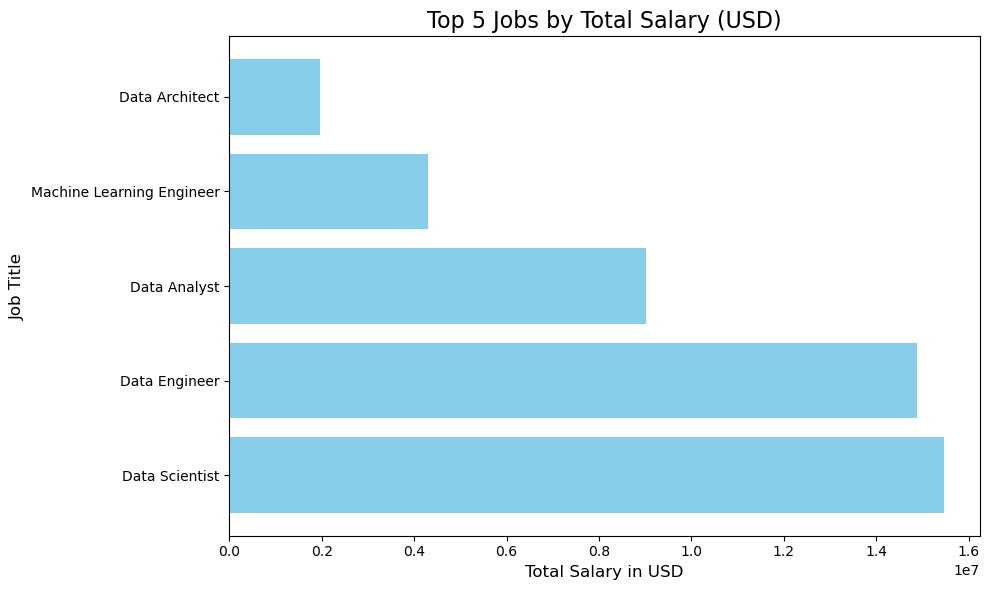

In [47]:
# Top 5 sum of salaries for each job title
# Sort the DataFrame by salary_in_usd in descending order
total_salary_by_job = df.groupby('job_title')['salary_in_usd'].sum()

# Sort by total salary and select the top 5 jobs
top_jobs_by_total_salary = total_salary_by_job.sort_values(ascending=False).head(5)

# Prepare data for the chart
job_titles = top_jobs_by_total_salary.index
salaries = top_jobs_by_total_salary.values

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(job_titles, salaries, color='skyblue')

# Add titles and labels
plt.title("Top 5 Jobs by Total Salary (USD)", fontsize=16)
plt.xlabel("Total Salary in USD", fontsize=12)
plt.ylabel("Job Title", fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

employment_type
Contract       922875
Freelance      192000
Full-Time    66719227
Part-Time      330705
Name: salary_in_usd, dtype: object


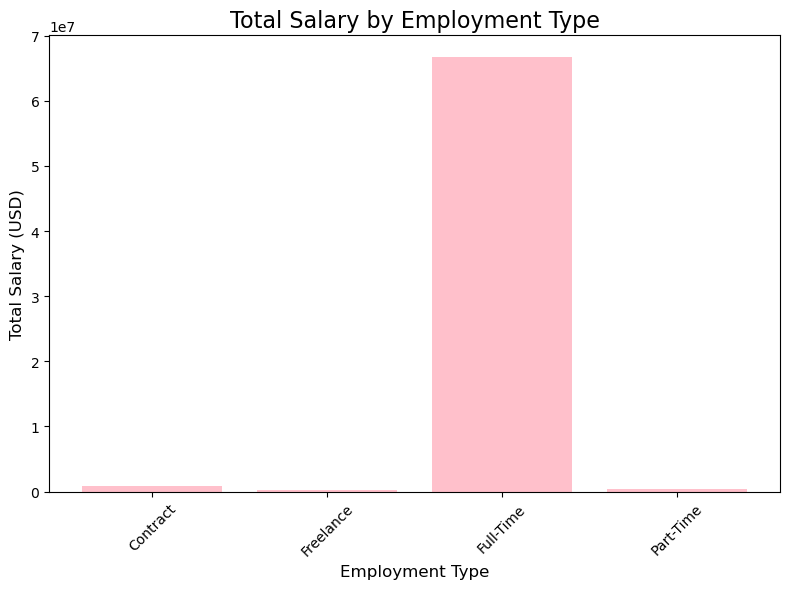

In [49]:
# salaries of employee by employment type
salary_by_employment_type = df.groupby('employment_type')['salary_in_usd'].sum()

# Print the result
print(salary_by_employment_type)
# Prepare data for the chart
plt.figure(figsize=(8, 6))
plt.bar(salary_by_employment_type.index, salary_by_employment_type.values, color='pink')

# Add titles and labels
plt.title("Total Salary by Employment Type", fontsize=16)
plt.xlabel("Employment Type", fontsize=12)
plt.ylabel("Total Salary (USD)", fontsize=12)

# Rotate x-axis labels for better readability (if needed)
plt.xticks(rotation=45)

# Show the chart
plt.tight_layout()
plt.show()

company_size
Large     23610113
Medium    38111182
Small      6443512
Name: salary_in_usd, dtype: object


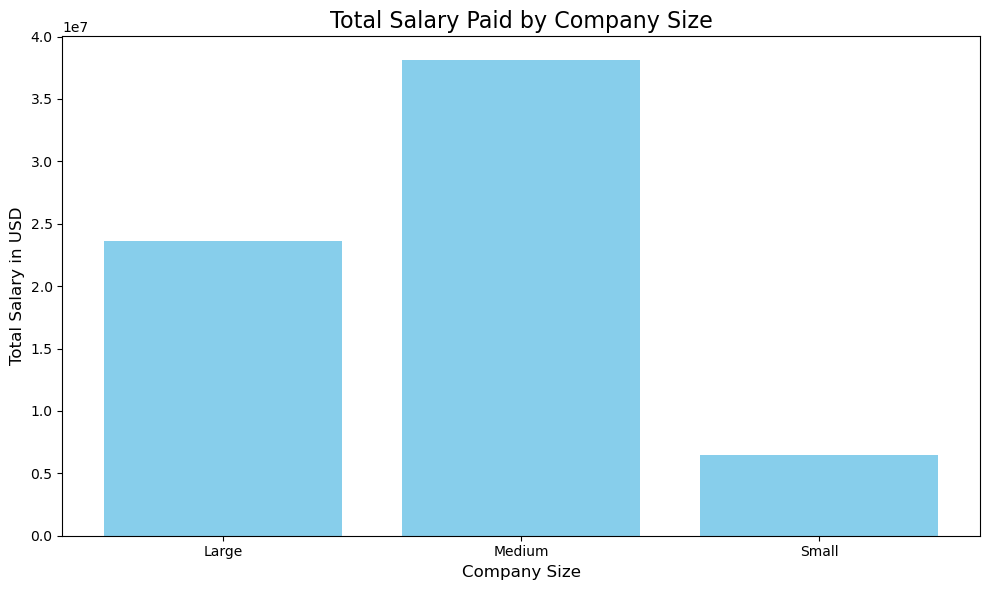

In [51]:
# Total salary paid by company size
total_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].sum()

# Print the results for verification
print(total_salary_by_company_size)
plt.figure(figsize=(10, 6))
plt.bar(total_salary_by_company_size.index, total_salary_by_company_size.values, color='skyblue')

# Add titles and labels
plt.title("Total Salary Paid by Company Size", fontsize=16)
plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Total Salary in USD", fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

Average Salary by Experience Level:
experience_level
Entry Level      61643.318182
Expert          199392.038462
Middle Level     87996.056338
Senior Level    138617.292857
Name: salary_in_usd, dtype: object

Total Sum of Average Salaries: 487648.70583852765


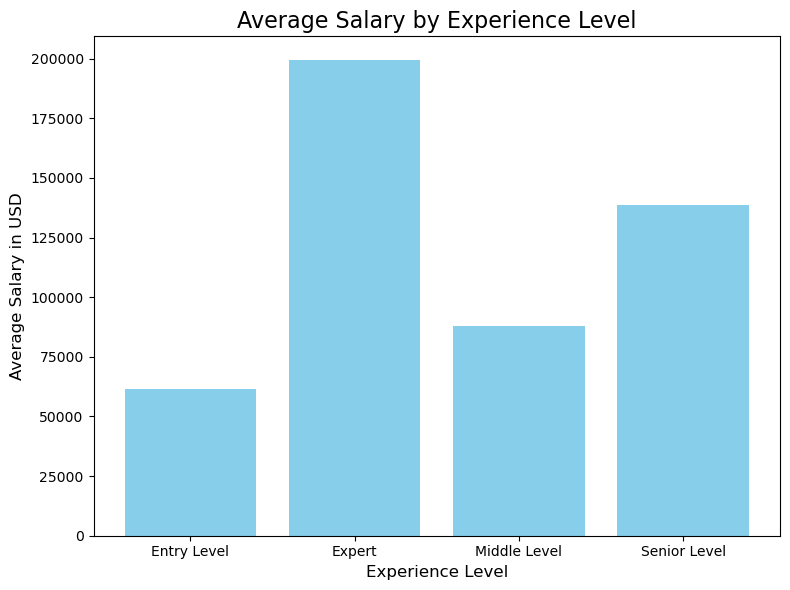

In [53]:
# Average Salary by experience level
average_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()

# Print the average salary for each experience level
print("Average Salary by Experience Level:")
print(average_salary_by_experience)

# Calculate the sum of average salaries
sum_of_averages = average_salary_by_experience.sum()

# Print the total sum of average salaries
print(f"\nTotal Sum of Average Salaries: {sum_of_averages}")

# Add titles and labels
plt.figure(figsize=(8, 6))
plt.bar(average_salary_by_experience.index, average_salary_by_experience.values, color='skyblue')

# Add titles and labels
plt.title("Average Salary by Experience Level", fontsize=16)
plt.xlabel("Experience Level", fontsize=12)
plt.ylabel("Average Salary in USD", fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

remote_ratio
Fully Remote        46656290
No Remote           13507037
Partially Remote     8001480
Name: salary_in_usd, dtype: object


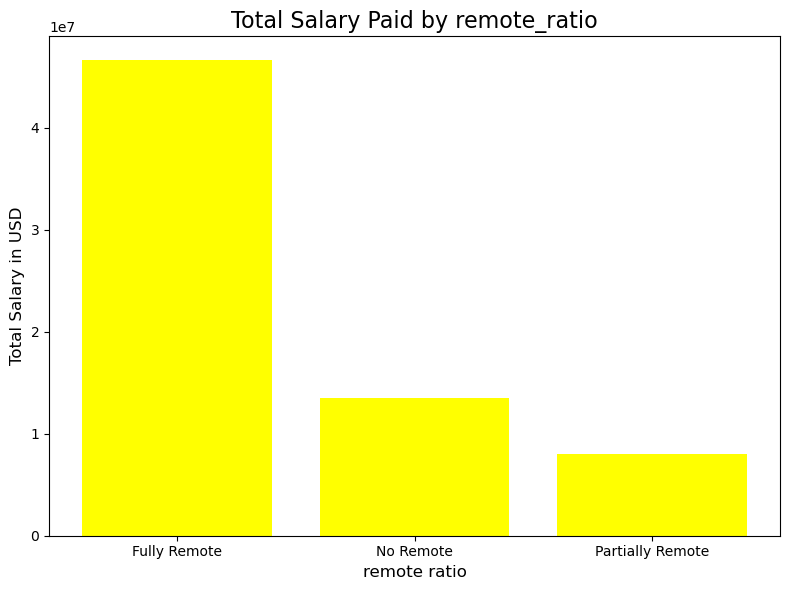

In [55]:
# salaries earned in various remote ratio
total_salary_by_remote_ratio = df.groupby('remote_ratio')['salary_in_usd'].sum()

# Print the results for verification
print(total_salary_by_remote_ratio)
plt.figure(figsize=(8, 6))
plt.bar(total_salary_by_remote_ratio.index, total_salary_by_remote_ratio.values, color='yellow')

# Add titles and labels
plt.title("Total Salary Paid by remote_ratio", fontsize=16)
plt.xlabel("remote ratio", fontsize=12)
plt.ylabel("Total Salary in USD", fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

Top 10 Highest Paying Locations:
   company_location salary_in_usd
48               US      51139618
18               GB       3834403
6                CA       2994712
12               DE       2292842
17               FR        959560
16               ES        742842
25               IN        685962
29               JP        684764
19               GR        575224
3                AU        324128


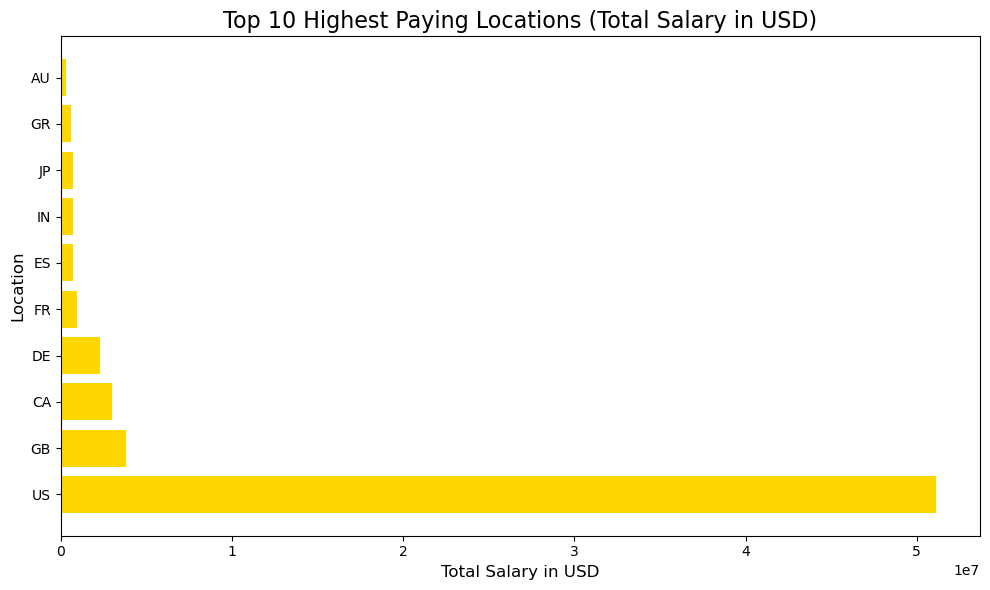

In [57]:
# top 10 highest paying company location
salary_by_location = df.groupby('company_location')['salary_in_usd'].sum().reset_index()

# Print the aggregated data
# Sort the data by total salary in descending order and select the top 10
top_10_locations = salary_by_location.sort_values(by='salary_in_usd', ascending=False).head(10)

# Print the top 10 locations
print("Top 10 Highest Paying Locations:")
print(top_10_locations)

# Prepare data for the chart
locations = top_10_locations['company_location']
salaries = top_10_locations['salary_in_usd']

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(locations, salaries, color='gold')

# Add titles and labels
plt.title("Top 10 Highest Paying Locations (Total Salary in USD)", fontsize=16)
plt.xlabel("Total Salary in USD", fontsize=12)
plt.ylabel("Location", fontsize=12)

# Display the chart
plt.tight_layout()
plt.show()

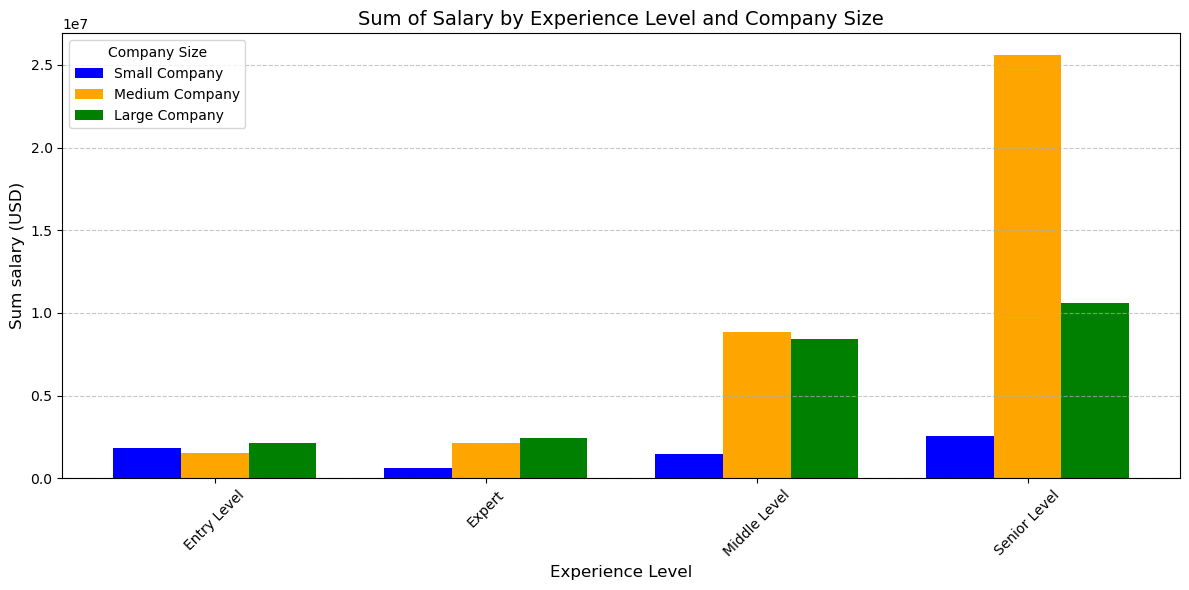

In [136]:
# Total salary by experience level and company size
pivot_df = df.pivot_table(
    values='salary_in_usd', 
    index='experience_level', 
    columns='company_size', 
    aggfunc='sum'
)

# Step 2: Prepare data for plotting
categories = pivot_df.index  # Experience levels (x-axis labels)
x = np.arange(len(categories))  # Numeric positions for x-axis
bar_width = 0.25  # Width of each bar

# Extract salaries for each company size dynamically
small_size = pivot_df['Small'] if 'Small' in pivot_df.columns else [0] * len(categories)
medium_size = pivot_df['Medium'] if 'Medium' in pivot_df.columns else [0] * len(categories)
large_size = pivot_df['Large'] if 'Large' in pivot_df.columns else [0] * len(categories)

# Step 3: Plot the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, small_size, bar_width, label='Small Company', color='blue')
plt.bar(x, medium_size, bar_width, label='Medium Company', color='orange')
plt.bar(x + bar_width, large_size, bar_width, label='Large Company', color='green')

# Step 4: Customize the chart
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Sum salary (USD)', fontsize=12)
plt.title('Sum of Salary by Experience Level and Company Size', fontsize=14)
plt.xticks(x, categories, fontsize=10, rotation=45)  # Rotate for better readability
plt.legend(title="Company Size")
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Step 5: Display the chart
plt.tight_layout()
plt.show()